In [3]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
def rotation(r):
    return np.asarray([np.cos(r), -np.sin(r), np.sin(r), np.cos(r)]).reshape(2, 2)



In [ ]:

def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """

    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=1000):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals


if __name__ == "__main__":
    from matplotlib import pyplot as plt

    nPoints = 4
    points = np.random.rand(nPoints,2)*200
    xpoints = [p[0] for p in points]
    ypoints = [p[1] for p in points]

    xvals, yvals = bezier_curve(points, nTimes=1000)
    plt.plot(xvals, yvals)
    plt.plot(xpoints, ypoints, "ro")
    for nr in range(len(points)):
        plt.text(points[nr][0], points[nr][1], nr)

    plt.show()

In [ ]:
import numpy as np
from scipy.special import comb

def get_bezier_parameters(X, Y, degree=3):
    """ Least square qbezier fit using penrose pseudoinverse.

    Parameters:

    X: array of x data.
    Y: array of y data. Y[0] is the y point for X[0].
    degree: degree of the Bézier curve. 2 for quadratic, 3 for cubic.

    Based on https://stackoverflow.com/questions/12643079/b%C3%A9zier-curve-fitting-with-scipy
    and probably on the 1998 thesis by Tim Andrew Pastva, "Bézier Curve Fitting".
    """
    if degree < 1:
        raise ValueError('degree must be 1 or greater.')

    if len(X) != len(Y):
        raise ValueError('X and Y must be of the same length.')

    if len(X) < degree + 1:
        raise ValueError(f'There must be at least {degree + 1} points to '
                         f'determine the parameters of a degree {degree} curve. '
                         f'Got only {len(X)} points.')

    def bpoly(n, t, k):
        """ Bernstein polynomial when a = 0 and b = 1. """
        return t ** k * (1 - t) ** (n - k) * comb(n, k)
        #return comb(n, i) * ( t**(n-i) ) * (1 - t)**i

    def bmatrix(T):
        """ Bernstein matrix for Bézier curves. """
        return np.matrix([[bpoly(degree, t, k) for k in range(degree + 1)] for t in T])

    def least_square_fit(points, M):
        M_ = np.linalg.pinv(M)
        return M_ * points

    T = np.linspace(0, 1, len(X))
    M = bmatrix(T)
    points = np.array(list(zip(X, Y)))
    
    final = least_square_fit(points, M).tolist()
    final[0] = [X[0], Y[0]]
    final[len(final)-1] = [X[len(X)-1], Y[len(Y)-1]]
    return final

In [ ]:
def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """
    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=50):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals

In [ ]:
points = []
xpoints = [19.21270, 19.21269, 19.21268, 19.21266, 19.21264, 19.21263, 19.21261, 19.21261, 19.21264, 19.21268,19.21274, 19.21282, 19.21290, 19.21299, 19.21307, 19.21316, 19.21324, 19.21333, 19.21342]
ypoints = [-100.14895, -100.14885, -100.14875, -100.14865, -100.14855, -100.14847, -100.14840, -100.14832, -100.14827, -100.14823, -100.14818, -100.14818, -100.14818, -100.14818, -100.14819, -100.14819, -100.14819, -100.14820, -100.14820]
for i in range(len(xpoints)):
    points.append([xpoints[i],ypoints[i]])

In [ ]:
import matplotlib.pyplot as plt
# Plot the original points
plt.plot(xpoints, ypoints, "ro",label='Original Points')
# Get the Bezier parameters based on a degree.
data = get_bezier_parameters(xpoints, ypoints, degree=4)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
print(data)
# Plot the control points
plt.plot(x_val,y_val,'k--o', label='Control Points')
# Plot the resulting Bezier curve
xvals, yvals = bezier_curve(data, nTimes=1000)
plt.plot(xvals, yvals, 'b-', label='B Curve')
plt.legend()
plt.show()

In [ ]:
# from 'towards data science'

import numpy as np
import matplotlib.pyplot as plt

# find the a & b points
def get_bezier_coef(points):
    # since the formulas work given that we have n+1 points
    # then n must be this:
    n = len(points) - 1

    # build coefficents matrix
    C = 4 * np.identity(n)
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2

    # build points vector
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # solve system, find a & b
    A = np.linalg.solve(C, P)
    B = [0] * n
    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]
    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B

# returns the general Bezier cubic formula given 4 control points
def get_cubic(a, b, c, d):
    return lambda t: np.power(1 - t, 3) * a + 3 * np.power(1 - t, 2) * t * b + 3 * (1 - t) * np.power(t, 2) * c + np.power(t, 3) * d

# return one cubic curve for each consecutive points
def get_bezier_cubic(points):
    A, B = get_bezier_coef(points)
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]

# evalute each cubic curve on the range [0, 1] sliced in n points
def evaluate_bezier(points, n):
    curves = get_bezier_cubic(points)
    return np.array([fun(t) for fun in curves for t in np.linspace(0, 1, n)])

In [ ]:
# using the above...

# generate 5 (or any number that you want) random points that we want to fit (or set them youreself)
points = np.random.rand(5, 2)

# fit the points with Bezier interpolation
# use 50 points between each consecutive points to draw the curve
path = evaluate_bezier(points, 50)

# extract x & y coordinates of points
x, y = points[:,0], points[:,1]
px, py = path[:,0], path[:,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(px, py, 'b-')
plt.plot(x, y, 'ro')
plt.show()

In [ ]:
# read in XD deck data

file = open("/Users/sdynes/IBI/MIT_t4t/XD_deck_data_orig.csv")
deck_data_orig = np.loadtxt(file, delimiter=",")
mast = np.array([[1865,0]]) # measured in same manner for long, lat set to 0
print(deck_data_orig)


In [ ]:
# fix deck data. Remove linear 'lat' so that final vlaue of 28.5 is 0

#print(deck_data_orig[:,1] - ((deck_data_orig[:,0]-172)/(3301-172))*28.5)

deck_data_fixed = deck_data_orig

deck_data_fixed[:,1]  = deck_data_orig[:,1] - ((deck_data_orig[:,0]-172)/(3301-172))*28.5


In [ ]:
a = np.copy(deck_data_fixed)
b = np.copy(deck_data_fixed)
b[:,1] = -1.0 * b[:,1]
deck_data_whole = np.vstack((a,np.flipud(b)))
print(deck_data_whole)

In [ ]:
# translate the result to meters, and save the result

# C&C 43 custom LOA is 13.21 m and  (3249-95.5) pixels
# the forward edge of the mast hole is at 1864.5,0

# the location of the mast:
mast = np.array([[1864.5,0]])

deck_data_whole_m = deck_data_whole/((3249-95.5)/13.21)
mast_m = mast/((3249-95.5)/13.21)
                                   
np.savetxt("/Users/sdynes/IBI/MIT_t4t/XD_deck_data_whole_m.csv",deck_data_whole_m, delimiter=',')
np.savetxt("/Users/sdynes/IBI/MIT_t4t/XD_mast_m.csv",mast_m, delimiter=',')

In [ ]:
x_pts = deck_data_whole_m[:,0]
y_pts = deck_data_whole_m[:,1]
# Plot the original points
plt.plot(x_pts, y_pts, "ro",label='Original Points')
# Get the Bezier parameters based on a degree.
data = get_bezier_parameters(x_pts, y_pts, degree=9)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
#print(data)
# Plot the control points
#plt.plot(x_val,y_val,'k--o', label='Control Points')
# Plot the resulting Bezier curve
xvals, yvals = bezier_curve(data, nTimes=1000)
plt.plot(xvals, yvals, 'b-', label='B Curve')
#plt.legend()
plt.axis('equal')
plt.show()


In [ ]:
plt.plot(x_pts, y_pts)
plt.axis('equal')


In [ ]:
# using 'towards data science':

# using the above...

# generate 5 (or any number that you want) random points that we want to fit (or set them youreself)
points = deck_data_whole_m

# fit the points with Bezier interpolation
# use 50 points between each consecutive points to draw the curve
path = evaluate_bezier(points, 50)

# extract x & y coordinates of points
x, y = points[:,0], points[:,1]
px, py = path[:,0], path[:,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(px, py, 'b-')
plt.plot(x, y, 'ro')
plt.axis('equal')
plt.show()

It seems that with the 'towards data science' we have a good way of creating a set of splines. This still is not parameterized. The parameterization we actually want is the orientation of the boat with respect to the line and the maximum extent of the boat in the direction that is the starting direction. 

I think we can use the actual measured points themselves (the density here seems quite adequte for a 6-inch accuracy), and translate them so the boat center is at 0,0 (this should be easy to do), with the bow 'up'. Using a rotation matrix to translate the points it should be easy to see what the maximal extent of the boat in the direction of the line is, and using an appropriate translation to account for the location of the device in principle we can tell how close the boat is to the line. 


The next steps are:

1) translate the boat deck coordinates to have the center at 0,0

2) create the rotational transformation

3) find the max distance from the center of the boat in the new orientation

4) take into account the position of the device

5) see how close the boat is to being over the line



In [ ]:
# 1) translate the boat deck coordinates to have the center at 0,0

# read in the complete boat data
file = open("/Users/sdynes/IBI/MIT_t4t/XD_deck_data_whole_m.csv")
deck_data_orig = np.loadtxt(file, delimiter=",")

file = open("/Users/sdynes/IBI/MIT_t4t/XD_mast_m.csv")
mast_m = np.loadtxt(file, delimiter=",")
mast_m = np.reshape(mast_m, (-1, 2))

deck_data_centered = np.copy(deck_data_orig)
mast_centered = np.copy(mast_m)

# translate the 'long' values to the middle of the boat
long_max = np.max(deck_data_orig[:,0])
long_min = np.min(deck_data_orig[:,0])
deck_data_centered[:,0]=deck_data_orig[:,0] - long_min - (long_max-long_min)/2.0

# the mast measurement comes along as well...

mast_centered[:,0]=mast_m[:,0] - long_min - (long_max-long_min)/2.0


deck_data_centered[:,0]=deck_data_orig[:,0] - long_min - (long_max-long_min)/2.0
# translate the 'lat' values to the middle of the boat
long_max = np.max(deck_data_orig[:,1])
long_min = np.min(deck_data_orig[:,1])
deck_data_centered[:,1]=deck_data_orig[:,1] - long_min - (long_max-long_min)/2.0


# save centered data
np.savetxt("/Users/sdynes/IBI/MIT_t4t/XD_deck_data_centered.csv",deck_data_centered, delimiter=',')
#print(deck_data_centered)

# plot
plt.figure(figsize=(11, 8))
plt.plot(deck_data_centered[:,0], deck_data_centered[:,1], 'ro')
plt.plot(mast_centered[:,0], mast_centered[:,1], 'bo')
plt.axis('equal')
plt.show()

In [ ]:
# 4) take into account the position of the device

# The device will be located some x,y offset from some know thing like the mast. 
# So, will have a mast location, and then a device offset from that.
#
# So, in prime frame define the front of the mast on the centerline to be 0,0

# deck_data_centered -> ddc, mast_centered -> mc
ddc_prime = deck_data_centered - mast_centered
mc_prime = mast_centered - mast_centered


# let's sat device is 1 m infront of and 1 to port of the mast (in the prime frame):
dev_prime = np.array([[1, 1]])

# move everything into the dev frame, where the device is at 0,0:

ddc_dev = ddc_prime - dev_prime
mc_dev = mc_prime - dev_prime
dev_dev = dev_prime - dev_prime

# plot
plt.figure(figsize=(11, 8))
plt.plot(ddc_dev[:,0], ddc_dev[:,1], 'ro')
plt.plot(mc_dev[:,0], mc_dev[:,1], 'bo')
plt.plot(dev_dev[:,0], dev_dev[:,1], 'go')
plt.axis('equal')
plt.show()


In [ ]:
# 2) create the rotational transformation

# angles in radians, positive angle means turning boat counterclockwise

# create rotation matrix:
R = rotation(-3*np.pi/4) # should be 45 degress CCW. -<angle> because of how we are applying rotation matrix

# translate dd data:
rdd = np.matmul(ddc_dev, R)
rmast = np.matmul(mc_dev, R)
rdevice = np.matmul(dev_dev, R)
# plot
plt.figure(figsize=(11, 8))
plt.plot(rdd[:,0], rdd[:,1], 'ro')
plt.plot(rmast[:,0], rmast[:,1], 'bo')
plt.plot(rdevice[:,0], rdevice[:,1], 'go')
plt.axis('equal')
plt.show()

In [ ]:
# 3) find the max distance from the device of the boat in the new orientation

# this is just the max value in the positive 'long' direction

print(np.max(rdd[:,0]))


In [ ]:
# 5) see how close the boat is to being over the line

# start out by determining the rotation needed to make the starting line on the x axis

np.arctan2(10,-3)*360/(2*np.pi)

In [ ]:
rc=np.array([1,3])
pi=np.array([4,4])

line = np.array([rc, pi])


R = rotation(-np.arctan2([rc[0]-pi[0]],[rc[1]-pi[1]])+np.pi/2)

rrc = np.matmul(rc, R)
rpi = np.matmul(pi, R)

y_trans = rrc[1]
 
rrc[1]=rrc[1]-y_trans
rpi[1]=rpi[1]-y_trans
 
fig, ax = plt.subplots(1)
ax.plot([rrc[0],rpi[0]],[rrc[1],rpi[1]])

In [ ]:
rc=np.array([1,3])
pi=np.array([4,4])

line = np.array([rc, pi])

R = rotation(-np.arctan2([rc[0]-pi[0]],[rc[1]-pi[1]])+np.pi/2)

r_line = np.matmul(line, R)

rc_trans = np.array(r_line[0,:])

rt_line = r_line - rc_trans

plt.plot(rt_line[:,0],rt_line[:,1])

In [7]:
#make some data
cur_data = {}
cur_data['rc'] = [3,4]
cur_data['pi'] = [7,2]
cur_data['12'] = [1,4]
cur_data['2'] = [-1,4]
cur_data['13'] = [9,9]

In [4]:
cur_data.keys()
for i in cur_data.keys():
    print(i)

rc
pi
12
2
13


In [5]:
line = np.array([cur_data['rc'],cur_data['pi']])
tmp = -np.diff(line, axis=0)

# compute the rotation matrice
#R = rotation(-np.arctan2(tmp[0][0], tmp[0][1])+np.pi/2)
R = np.identity(2)

# rotate the line
r_line = np.matmul(line,R)

# get the translation vector
#rc_trans = r_line[0,:]
rc_trans = [0,0] 

# translate the line
rt_line = r_line - rc_trans

# set up the plot 
fig, ax = plt.subplots(1)

# clear the axes
ax.clear()
# plot the starting line
plt.plot(rt_line[:,0],rt_line[:,1])

# plot the boats
for i in cur_data.keys():
    if i not in ['rc','pi']:
        tmp = np.array(cur_data[i])
        r_tmp = np.matmul(tmp,R)
        rt_tmp = r_tmp - rc_trans
        plt.scatter(rt_tmp[0], rt_tmp[1] )

plt.xlim([-10,10])
plt.ylim([-10,10])
ax.set_aspect('equal')
plt.show()

NameError: name 'cur_data' is not defined

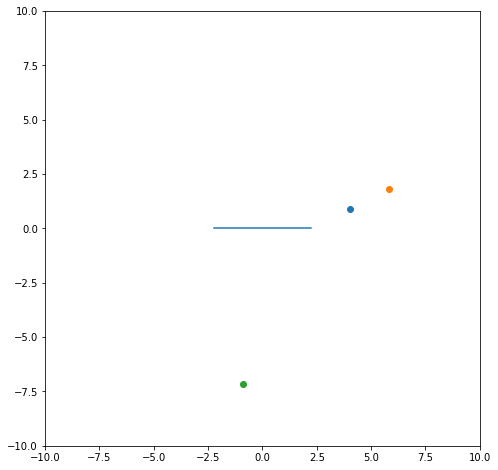

In [8]:
line = np.array([cur_data['rc'],cur_data['pi']])
tmp = -np.diff(line, axis=0)

# compute the rotation matrice
R = rotation(-np.arctan2(tmp[0][0], tmp[0][1])+np.pi/2)
#R = np.identity(2)

# rotate the line
r_line = np.matmul(line,R)

# get the translation vector
rc_trans = np.array(r_line[0,:])
tmp =  rc_trans[0] - (r_line[0,0]-r_line[1,0])/2
rc_trans[0] -= (r_line[0,0]-r_line[1,0])/2
#rc_trans = [0,0] 

# translate the line
rt_line = r_line - rc_trans

# set up the plot 

fig, ax = plt.subplots(1, figsize=(8,8))

# clear the axes
ax.clear()
# plot the starting line
plt.plot(rt_line[:,0],rt_line[:,1])

# plot the boats
for i in cur_data.keys():
    if i not in ['rc','pi']:
        tmp = np.array(cur_data[i])
        r_tmp = np.matmul(tmp,R)
        rt_tmp = r_tmp - rc_trans
        plt.scatter(rt_tmp[0], rt_tmp[1] )

plt.xlim([-10,10])
plt.ylim([-10,10])
ax.set_aspect('equal')
plt.show()

In [9]:
line

array([[3, 4],
       [7, 2]])

In [83]:
(r_line[0,0]-r_line[1,0])/2

1.1180339887498947

In [85]:
rc_trans

array([-3.13049517, -4.91934955])

In [86]:
tmp =  rc_trans[0] - (r_line[0,0]-r_line[1,0])/2
print(tmp)

-4.2485291572496


In [75]:
rc_trans

array([-3.13049517, -4.91934955])

In [77]:
rc_trans[0] = tmp
print(rc_trans)

[-4.24852916 -4.91934955]


In [80]:
r_line - rc_trans


array([[ 0.        ,  0.        ],
       [-1.11803399,  0.        ]])